## FLIGHT PRICE DATASET

### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
### dataset have?

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('flight_price.csv')
df.shape

(10683, 11)

### Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
### distribution.

<AxesSubplot:xlabel='Price', ylabel='Count'>

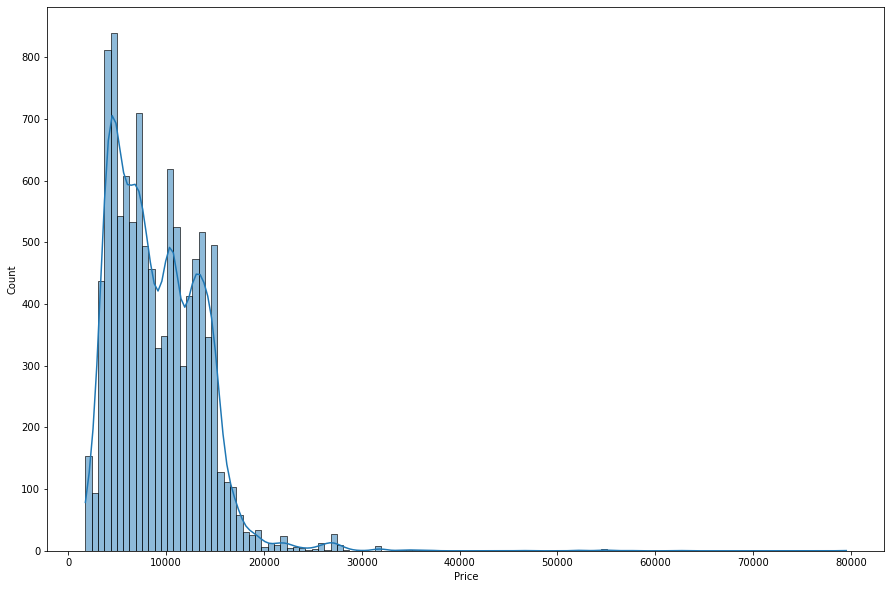

In [2]:
df.head()
# df.info()
df['Price']=df['Price'].astype(int)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.histplot(df['Price'],kde=True)

### Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [3]:
lower=df['Price'].min()
upper=df['Price'].max()
print("the range of prices ",lower ,'-',upper)

the range of prices  1759 - 79512


### Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
### airlines.

In [4]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

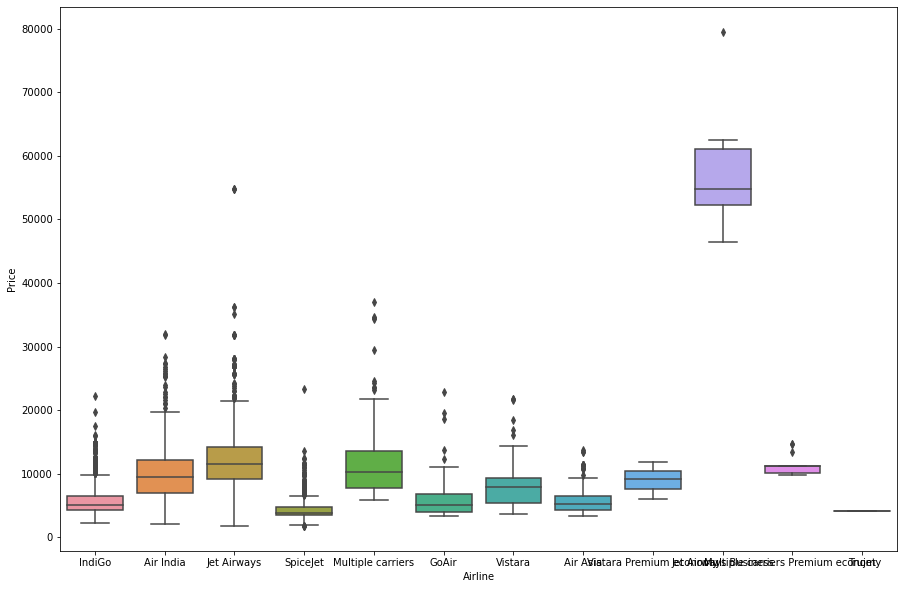

In [5]:
df.head()
plt.figure(figsize=(15, 10))
sns.boxplot(x=df['Airline'],y=df['Price'])


### Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
### they may impact your analysis.


In [6]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


<AxesSubplot:>

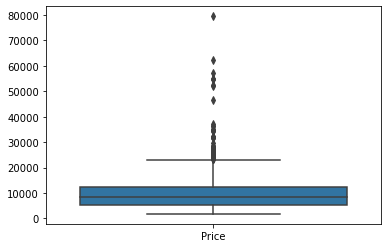

In [7]:
sns.boxplot(data=df)

In [8]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)
iqr = q3 - q1

# Define the lower and upper bounds for outlier detection
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = (df['Price'] < lower_bound) | (df['Price'] > upper_bound)
cleaned_data= df[~outliers]
print(cleaned_data)

           Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun

### Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
### to identify the peak travel season. What features would you analyze to identify the peak season, and how
### would you present your findings to your boss?


In [9]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
df['date']=df['Date_of_Journey'].str.split('/').str[0]
df['month']=df['Date_of_Journey'].str.split('/').str[1]
df['year']=df['Date_of_Journey'].str.split('/').str[2]

In [11]:
df['month'].mode()

0    05
dtype: object

### FINDINGS : we find that the most peak season is the month of may

In [12]:
m=df['Destination'].value_counts()

<AxesSubplot:xlabel='Destination', ylabel='count'>

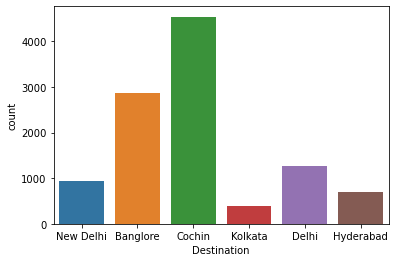

In [13]:
df['Destination'].unique()
sns.countplot(x='Destination',data = df)

### FINDINGS : we can say that most of the people are going to cochin , it may be favorite site

### Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
### Price dataset to identify any trends in flight prices. What features would you analyze to identify these
### trends, and what visualizations would you use to present your findings to your team?


<AxesSubplot:xlabel='Price', ylabel='date'>

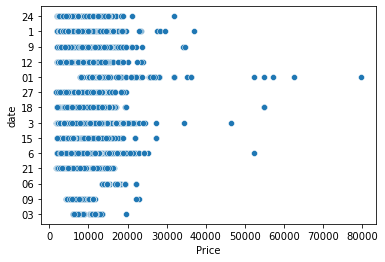

In [14]:
sns.scatterplot(x = 'Price',data = df,y = 'date')
# df['year'].unique()

<AxesSubplot:xlabel='Price', ylabel='month'>

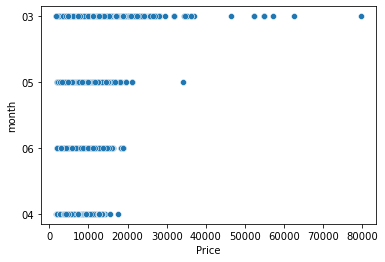

In [15]:
sns.scatterplot(x = 'Price',data = df,y = 'month')

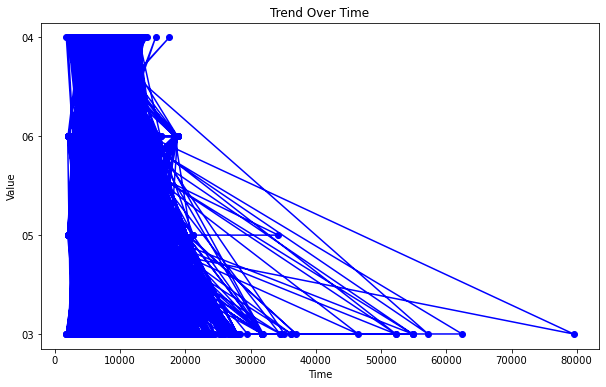

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume 'df' is your DataFrame with a column representing time
plt.figure(figsize=(10, 6))
plt.plot(df['Price'], df['month'], marker='o', linestyle='-', color='b')
plt.title('Trend Over Time')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


### Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
### Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
### identify these factors, and how would you present your findings to the management team?

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


## google playstore

### Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
### the dataset have?



In [21]:
df1=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df1.head()
df1.shape

(10841, 13)

### Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
### app categories.

<Figure size 1800x1800 with 0 Axes>

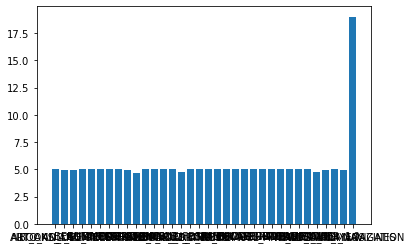

<Figure size 1800x1800 with 0 Axes>

In [34]:
plt.bar(df1['Category'],df1['Rating'])
plt.figure(figsize=(25,25))

### Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
### impact your analysis.


In [35]:
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Reduced Sample Size: Missing values reduce the effective sample size available for analysis. This reduction in sample size can affect the statistical power of analyses, making it harder to detect true effects or relationships.

Bias in Estimates: Missing data can introduce bias into statistical estimates if the missingness is not random. For example, if certain demographic groups are more likely to have missing values, it can lead to biased estimates of population parameters.

Distorted Relationships: Missing data can distort relationships between variables. For example, if missing values are related to the values of other variables, the observed relationships between variables may not accurately reflect the true relationships in the population.

### Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
### the relationship.


In [71]:
df1['Size']=df1['Size'].str.replace('M','000')
df1['Size']=df1['Size'].str.replace('k','')
df1['Size']=df1['Size'].replace('Varies with device',np.nan)
df1['Size']=df1['Size'].astype(float)
df1['Rating'].unique()
df1['Rating']=df1['Rating'].astype(float)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='Size'>

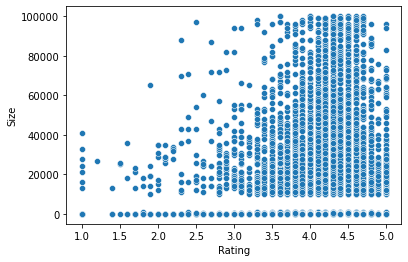

In [73]:
sns.scatterplot(df1['Rating'],df1['Size'])

### Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.


In [104]:
chars_to_remove=['+',',','$']
cols_to_clean=['Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df1[cols]=df1[cols].str.replace(item,'')
# df1['Price']=df1['Price'].astype(float)


In [90]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [98]:
df1['Type']=label_encoder.fit_transform(df1['Type'])
df1['Type']=df1['Type'].astype(float)

<BarContainer object of 3 artists>

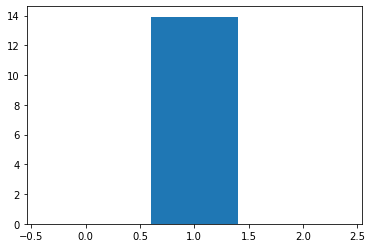

In [106]:
avgprice=df1.groupby('Type')['Price'].mean()
plt.bar(avgprice.index,avgprice.values)

### Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
### with the highest number of installs.


In [111]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df1[cols]=df1[cols].str.replace(item,'')
df1['Installs']=df1['Installs'].astype(float)


C:\Users\hp\AppData\Local\Temp/ipykernel_6180/1612364627.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1[cols]=df1[cols].str.replace(item,'')


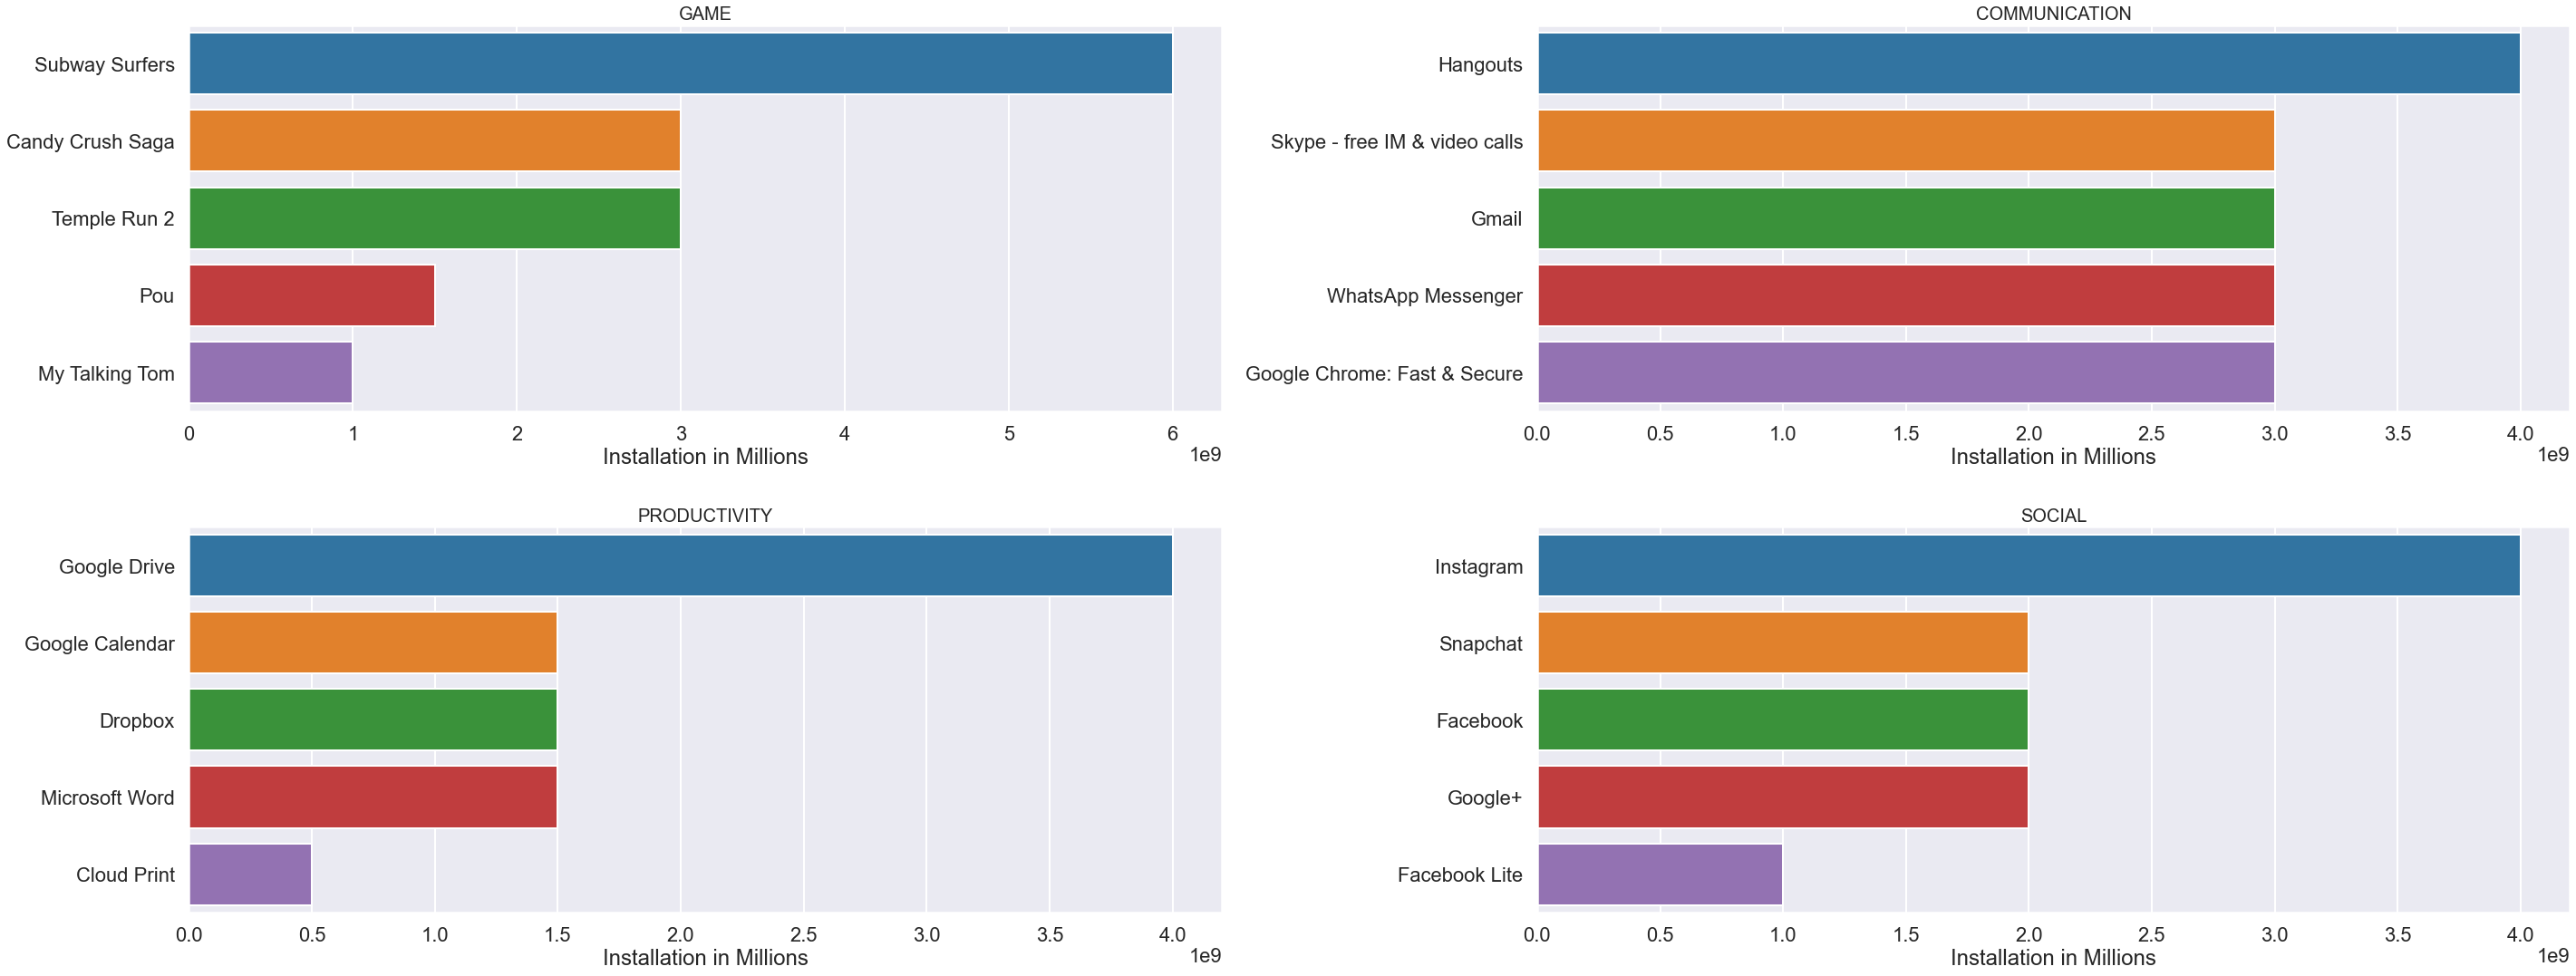

In [114]:
dfa = df1.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]
sns.set_context("poster")
sns.set_style("darkgrid")

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 20)

plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

### Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
### Google Playstore dataset to identify the most popular app categories. How would you approach this
### task, and what features would you analyze to make recommendations to the company?

Most popular game is Subway Surfers
.
Most popular communication app is Hangouts.

Most popular productivity app is Google Drive.

Most popular social app is Instagram.

### Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
### most successful app developers. What features would you analyze to make recommendations to the
### company, and what data visualizations would you use to present your findings?


Most popular game is Subway Surfers
.
Most popular communication app is Hangouts.

Most popular productivity app is Google Drive.

Most popular social app is Instagram.

### Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
### launch a new app. What features would you analyze to make recommendations to the company, and
### what data visualizations would you use to present your findings?### 

In [118]:
df1['Last Updated']=pd.to_datetime(df1['Last Updated'])
df1['Day']=df1['Last Updated'].dt.day
df1['Month']=df1['Last Updated'].dt.month
df1['Year']=df1['Last Updated'].dt.year

<AxesSubplot:xlabel='Month', ylabel='Count'>

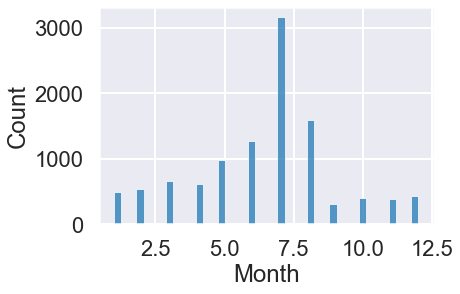

In [132]:
sns.histplot(df1['Month'])